In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
data = pd.read_csv("customer_data.csv")
df = pd.DataFrame(data)
df

,name,age,gender,education,income,country,purchase_frequency,spending
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780
...,...,...,...,...,...,...,...,...
995,Jason Haas,42,Female,PhD,98170,Bosnia and Herzegovina,0.7,17435.950
996,Sharon Valdez,39,Male,High School,59174,Eritrea,0.9,11662.830
997,Andrew Taylor,50,Male,Master,59808,Serbia,0.4,7196.160
998,Jessica Johnson,50,Female,Master,58272,Cyprus,0.7,13939.520


In [14]:
df_2 = df.head(100).copy()
df_2

,name,age,gender,education,income,country,purchase_frequency,spending
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780
...,...,...,...,...,...,...,...,...
95,Bradley Lewis,44,Male,PhD,98900,Chile,0.2,4589.000
96,Lisa Myers,61,Male,Master,73888,Lithuania,0.1,2069.440
97,Lindsay Fisher,57,Female,PhD,80146,Bahrain,0.1,2600.730
98,Kevin Torres,24,Female,Bachelor,22651,Tuvalu,0.1,1113.255


In [15]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [18]:
X = df_2[['income', 'spending']]
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X) 

In [22]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_2["cluster"] = dbscan.fit_predict(X_scaled)

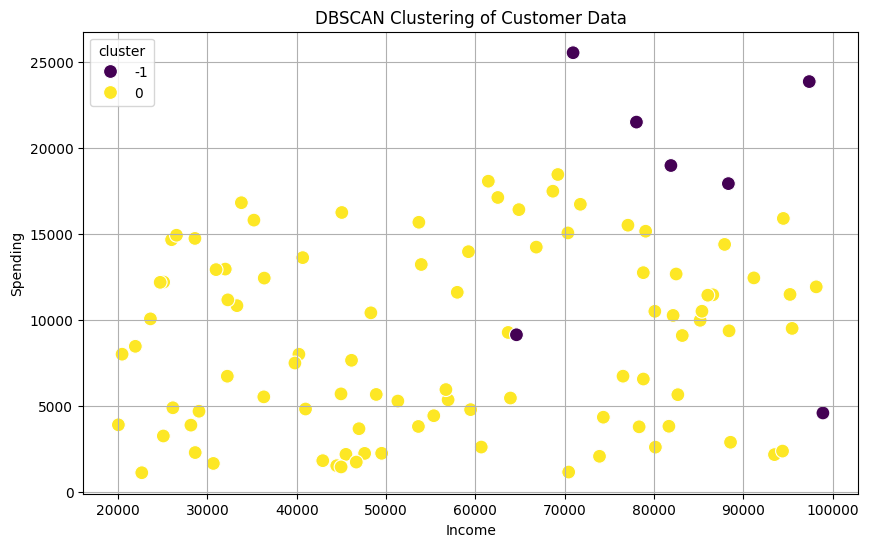

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_2, x='income', y='spending', hue='cluster', palette='viridis', s=100)
plt.title('DBSCAN Clustering of Customer Data')
plt.xlabel('Income')
plt.ylabel('Spending')
plt.grid(True)
plt.show()